In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import utils
utils.set_random_seed(11)
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

In [2]:
# loading data
df = pd.read_csv('/content/heart_disease_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# getting info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# dropping duplicates if any
df = df.drop_duplicates()

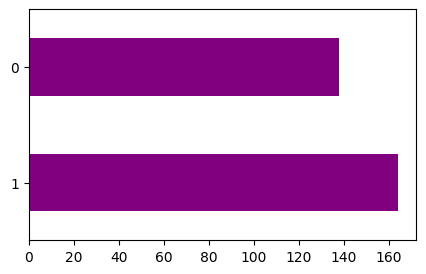

In [5]:
# getting value count of target
df['target'].value_counts().plot.barh(figsize=(5,3), color='purple');

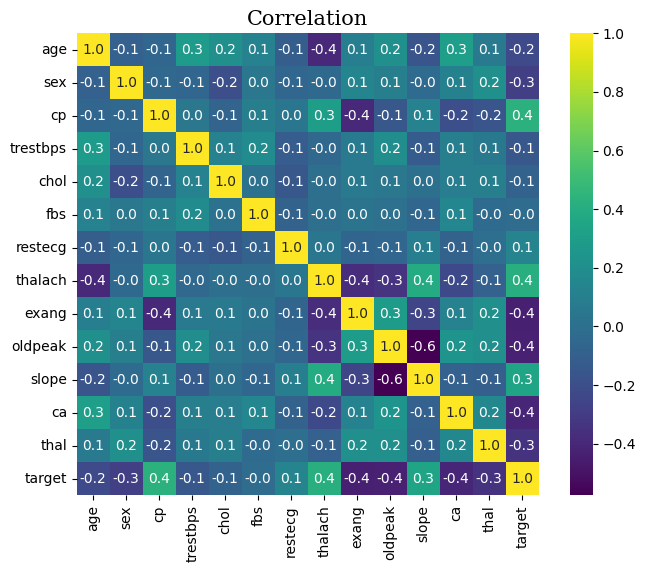

In [6]:
# correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.1f', square=True, cmap='viridis')
plt.title('Correlation', size=15, family='serif')
plt.show();

In [7]:
# creating X & y
X = df.drop('target', axis=1)
y = df['target']

In [8]:
# splitting dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)

In [9]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# model architecture
model = Sequential([
    layers.Input(shape=13, name='input layer'),
    layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', name='hidden_layer_1'),
    layers.BatchNormalization(),
    layers.Dropout(rate=.2),
    layers.Dense(units=16, activation='relu', kernel_initializer='he_normal', name='hidden_layer_2'),
    layers.BatchNormalization(),
    layers.Dropout(rate=.15),
    layers.Dense(units=1, activation='sigmoid', name='output_layer')
])

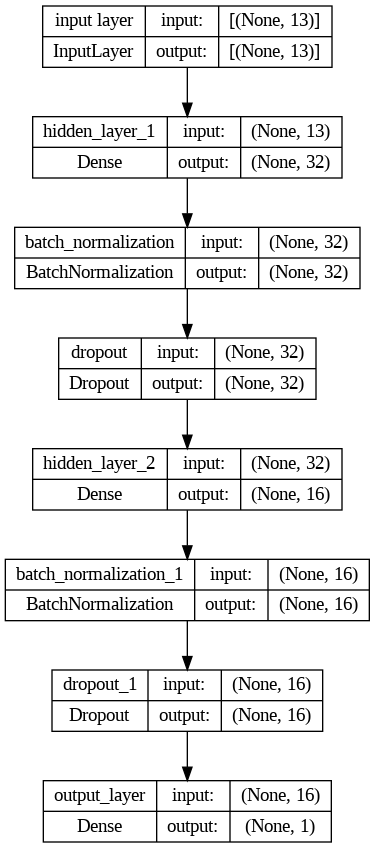

In [11]:
# plotting model architecture
utils.plot_model(model, show_shapes=True)

In [12]:
# model compilation
model.compile(optimizer=optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [13]:
# model training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=25, verbose=1,
                    callbacks=[callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5)])

Epoch 1/50
10/10 [==============================] - 1s 22ms/step - loss: 0.8036 - accuracy: 0.5975 - val_loss: 0.7138 - val_accuracy: 0.5902
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7473 - accuracy: 0.5934 - val_loss: 0.6410 - val_accuracy: 0.6557
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.7050 - accuracy: 0.6307 - val_loss: 0.5833 - val_accuracy: 0.7049
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.6473 - val_loss: 0.5315 - val_accuracy: 0.7049
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5822 - accuracy: 0.7012 - val_loss: 0.4898 - val_accuracy: 0.7377
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.7178 - val_loss: 0.4573 - val_accuracy: 0.8033
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5620 - accuracy: 0.7137 - val_loss: 0.4314 - val_accuracy: 0.8033
Epoch 8/50
10/10 [=

In [14]:
# model performance
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.30265721678733826, 'accuracy': 0.9016393423080444}

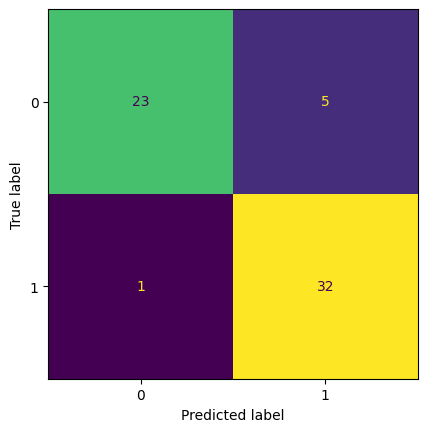

In [15]:
# plotting confusion matrix
cm = confusion_matrix(
    y_true = y_test,
    y_pred = np.where(model.predict(X_test, verbose=0) > .5, 1, 0))
disp = ConfusionMatrixDisplay(cm)
disp.plot(colorbar=False);

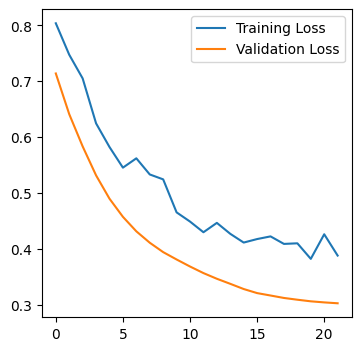

In [16]:
# plotting loss
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

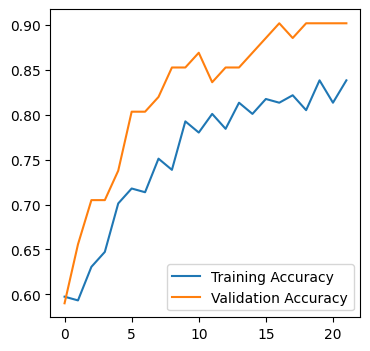

In [17]:
# plotting accuracy
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend();